# Extreme value analysis of time series - Application example

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import evapy

## Generating a Gaussian stochastic signal 

In [2]:
t = np.arange(0., 3*3600., 0.1)

In [3]:
#spectrum
signal_mean = 0.

In [4]:
discrete_size = 1000
amp_norm = stats.norm.rvs(size=discrete_size)
phase = stats.uniform.rvs(size=discrete_size)*2.*np.pi

In [21]:
freq = np.linspace(2.*np.pi*1./15., 2.*np.pi*1./5., num=discrete_size)

In [22]:
signal = np.zeros(len(t)) + signal_mean

for i, freq_i in enumerate(freq):
    signal = signal + amp_norm[i]*np.cos(freq_i*t + phase[i])

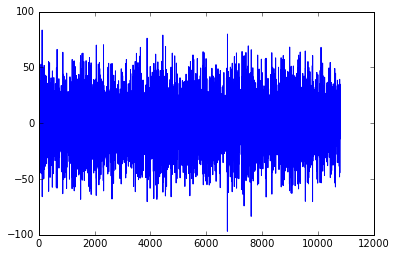

In [23]:
plt.plot(t, signal)
plt.show()

### Statistical analysis of the signal

In [24]:
descr_stats = stats.describe(signal)

print 'mean: {}'.format(descr_stats.mean)
print 'std: {}'.format(np.sqrt(descr_stats.variance))
print 'skewness: {}'.format(descr_stats.skewness)

mean: 0.0063061228224
std: 21.7340916218
skewness: -0.00376605747824


In [25]:
params = stats.norm.fit(signal)

In [26]:
signal_dist = stats.norm(*params)

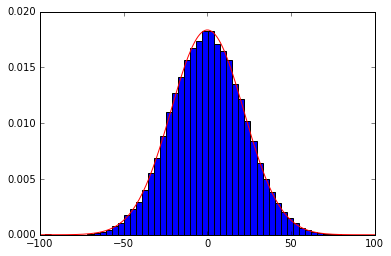

In [27]:
x = np.linspace(-100, 100, num=200)

plt.figure('signal histogram')
plt.plot(x, signal_dist.pdf(x), color='r')
plt.hist(signal, bins=50, normed=True)
plt.show()

### Extreme value analysis

In [28]:
peak_dc_index = evapy.evstats.argrelmax_decluster(signal, x_up=np.mean(signal))

peak_dc = signal[peak_dc_index]

In [29]:
params_peak = stats.rayleigh.fit(peak_dc)
peak_dist = stats.rayleigh(*params_peak)

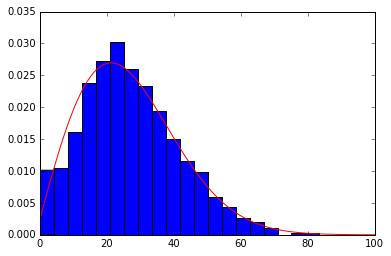

In [30]:
r = np.linspace(0, 100, num=100)

plt.figure('signal peaks histogram')
plt.plot(r, peak_dist.pdf(r), color='r')
plt.hist(peak_dc, bins=20, normed=True)
plt.show()

1517


### Transforming the signal to non-Gaussian

In [32]:
signal_ng = np.sign(signal)*(np.abs(signal))**1.1

In [33]:
params_ng = stats.norm.fit(signal_ng)
signal_ng_dist = stats.norm(*params_ng)

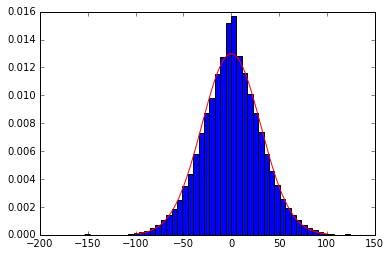

In [34]:
plt.figure('non-gaussian signal histogram')
plt.plot(x, signal_ng_dist.pdf(x), color='r')
plt.hist(signal_ng, bins=50, normed=True)
plt.show()